In [98]:
import csv
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [15]:
# reading the california wildfire csv data
df = pd.read_csv('California_wildfires.csv')
df

,Alarm Date,Unnamed: 1
0,6/18/2020,NaN
1,6/1/2020,NaN
2,8/10/2020,NaN
3,3/31/2020,NaN
4,4/14/2020,NaN
...,...,...
21698,3/3/21 21:03,NaN
21699,7/15/21 14:38,NaN
21700,4/25/2021,NaN
21701,7/14/21 0:15,NaN


In [16]:
# filtering the data set to contain "/" which indicates a date 
df2 = df[df['Alarm Date'].str.contains("/",na=False)]

In [20]:
# converting the data to a datetime format
df2['Alarm Date'] = pd.to_datetime(df['Alarm Date'],errors = 'coerce')

<ipython-input-20-e58ddb391287>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Alarm Date'] = pd.to_datetime(df['Alarm Date'],errors = 'coerce')


In [22]:
# now the dataset is formatted to datetime format
df2

,Alarm Date,Unnamed: 1
0,2020-06-18 00:00:00,NaN
1,2020-06-01 00:00:00,NaN
2,2020-08-10 00:00:00,NaN
3,2020-03-31 00:00:00,NaN
4,2020-04-14 00:00:00,NaN
...,...,...
21698,2021-03-03 21:03:00,NaN
21699,2021-07-15 14:38:00,NaN
21700,2021-04-25 00:00:00,NaN
21701,2021-07-14 00:15:00,NaN


In [27]:
# adding a month coloumn to the dataframe with monthly wildfire occurences
df2['month'] = pd.DatetimeIndex(df2['Alarm Date']).month

<ipython-input-27-96ee3c48b8e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = pd.DatetimeIndex(df2['Alarm Date']).month


In [60]:
# get the counts of each monthly occurence of wildfires
monthly_occurences = df2['month'].value_counts()

In [61]:
# 14 years in the dataset
mean_monthly_occurences = monthly_occurences/14

In [66]:
mean_monthly_occurences

7.0     276.071429
8.0     257.642857
6.0     184.428571
9.0     179.428571
10.0     86.214286
5.0      72.285714
11.0     36.928571
4.0      25.071429
12.0     16.142857
1.0      12.000000
3.0      11.714286
2.0       8.285714
Name: month, dtype: float64

In [67]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [12,8,11,25,72,184,276,257,179,86,36,16]

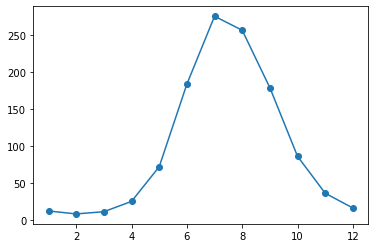

In [73]:
# plotting the mean wildfire occurences in California
plt.plot(x,y,marker='o')

In [89]:
# flash_drought and wildfire data corresponding by month
flash_drought = [12,8,11,25,72,184,276,257,179,86,36,16]
wildfire =  [1.09473684,  0.48421053,  0.34736842,0.46315789,  3.22105263,
        4.81052632, 14.27368421, 25.25263158,  8.4,  6.17894737,
        1.08421053,  0.6]

correlation: 0.874


C:\Users\I-SMART_Lab_03\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


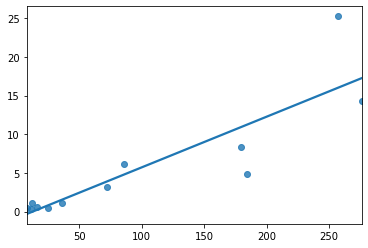

In [103]:
# plotting scatterplot of flash drought and wildfire data 
#plt.plot(flash_drought,wildfire,'o')
sns.regplot(flash_drought,wildfire,ci=None)
corr, _ = pearsonr(flash_drought, wildfire)
print('correlation: %.3f' % corr)

### Looking at the scatterplot we get an inital correlation of 0.874 which indicates a strong correlation between flash drought and wildfires, however we see a big outlier for the month of August

In [92]:
# flash_drought and wildfire data corresponding by month
flash_drought_noOutlier = [12,8,11,25,72,184,276,179,86,36,16]
wildfire_noOutlier =  [1.09473684,  0.48421053,  0.34736842,0.46315789,  3.22105263,
        4.81052632, 14.27368421,  8.4,  6.17894737,
        1.08421053,  0.6]

correlation: 0.943


C:\Users\I-SMART_Lab_03\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


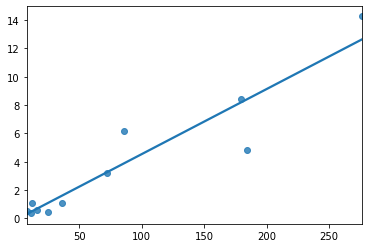

In [102]:
sns.regplot(flash_drought_noOutlier,wildfire_noOutlier,ci=None)
#m, b = np.polyfit(flash_drought_noOutlier, wildfire_noOutlier, 1)
#plt.plot(flash_drought_noOutlier, m*flash_drought_noOutlier+b)
corr, _ = pearsonr(flash_drought_noOutlier, wildfire_noOutlier)
print('correlation: %.3f' % corr)

#### After removing the outlier we get a new stronger correlation of 0.943 between flash drought events and wildfire occurences telling us that there is a relationship between the two variables